In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Charger les données
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')

# Aperçu des données
print(x_train.head())
print(y_train.head())


   Unnamed: 0.1  Unnamed: 0   train gare        date  arret  p2q0  p3q0  p4q0  \
0             0           0  VBXNMF  KYF  2023-04-03      8   0.0   0.0   1.0   
1             1           1  VBXNMF  JLR  2023-04-03      9   0.0   0.0   0.0   
2             2           2  VBXNMF  EOH  2023-04-03     10  -1.0   0.0   0.0   
3             3           3  VBXNMF  VXY  2023-04-03     11  -1.0  -1.0   0.0   
4             4           4  VBXNMF  OCB  2023-04-03     12  -1.0  -1.0  -1.0   

   p0q2  p0q3  p0q4  
0  -3.0  -1.0  -2.0  
1   1.0   0.0   1.0  
2  -1.0   0.0   0.0  
3   2.0  -2.0   0.0  
4  -1.0   3.0   2.0  
   Unnamed: 0  p0q0
0           0  -1.0
1           1  -1.0
2           2  -1.0
3           3   1.0
4           4   3.0


In [8]:
print(y_train.shape)  # Affiche la forme de y 
print(x_train.shape)  # Affiche la forme de x

(667264, 2)
(667264, 12)


In [4]:
print ( x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20657 entries, 0 to 20656
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20657 non-null  int64  
 1   train       20657 non-null  object 
 2   gare        20657 non-null  object 
 3   date        20657 non-null  object 
 4   arret       20657 non-null  int64  
 5   p2q0        20657 non-null  float64
 6   p3q0        20657 non-null  float64
 7   p4q0        20657 non-null  float64
 8   p0q2        20657 non-null  float64
 9   p0q3        20657 non-null  float64
 10  p0q4        20657 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB
None


In [9]:
print(x_train.info())
print(x_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667264 entries, 0 to 667263
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  667264 non-null  int64  
 1   Unnamed: 0    667264 non-null  int64  
 2   train         667264 non-null  object 
 3   gare          667264 non-null  object 
 4   date          667264 non-null  object 
 5   arret         667264 non-null  int64  
 6   p2q0          667264 non-null  float64
 7   p3q0          667264 non-null  float64
 8   p4q0          667264 non-null  float64
 9   p0q2          667264 non-null  float64
 10  p0q3          667264 non-null  float64
 11  p0q4          667264 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 61.1+ MB
None
        Unnamed: 0.1     Unnamed: 0          arret           p2q0  \
count  667264.000000  667264.000000  667264.000000  667264.000000   
mean   333631.500000  333631.500000      18.277499      -0.170696  

## Distribution de la variable cible y_train :

In [10]:
print(x_train.nunique())
print(x_train['date'].value_counts().head())  # Exemple pour la colonne 'date'

Unnamed: 0.1    667264
Unnamed: 0      667264
train            37544
gare                84
date                91
arret               36
p2q0               120
p3q0               123
p4q0               121
p0q2               121
p0q3               123
p0q4               123
dtype: int64
date
2023-05-16    8417
2023-05-10    8376
2023-04-17    8368
2023-06-21    8361
2023-05-22    8331
Name: count, dtype: int64


In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(y_train['p0q0'], bins=30, kde=True, color='blue')
plt.title("Distribution de p0q0 (variable cible)")
plt.xlabel("Différence entre les temps d'attente théorique et réel")
plt.ylabel("Fréquence")
plt.show()

## Distributions des variables historiques (p2q0, p3q0, etc.) 

In [13]:
past_variables = ['p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']
x_train[past_variables].hist(bins=20, figsize=(12, 8), color='green')
plt.suptitle("Distributions des variables historiques")
plt.show()


L'axe des x correspond aux valeurs numériques des variables historiques, c'est-à-dire les différences entre les temps d'attente théorique et réel pour les trains/stations spécifiques.

L'axe des y indique le nombre d'occurrences de chaque valeur ou intervalle de valeurs. Plus une barre est haute, plus cette valeur (ou cet intervalle) apparaît fréquemment dans les données.



## Verification des valeurs manquantes

In [14]:
print(x_train.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
train           0
gare            0
date            0
arret           0
p2q0            0
p3q0            0
p4q0            0
p0q2            0
p0q3            0
p0q4            0
dtype: int64


### Aucune valeur manquante

In [18]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Désactiver le GPU
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # Réduire les logs TensorFlow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import LambdaCallback

# Afficher les fichiers disponibles pour vérifier l'accès
print("Fichiers disponibles :", os.listdir())

# Chemins vers les fichiers
x_train = "x_train.csv"
y_train = "y_train.csv"

# 1. Chargement des fichiers
print("Chargement des fichiers...")
x_train = pd.read_csv(x_train)
y_train = pd.read_csv(y_train)
print("Fichiers chargés avec succès.")

# Suppression des colonnes inutiles
x_train_cleaned = x_train.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

# Gestion des valeurs aberrantes
def clip_outliers(df, columns, min_val, max_val):
    df[columns] = df[columns].clip(lower=min_val, upper=max_val)
    return df

cols_to_clip = ['p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']
min_threshold, max_threshold = -10, 10

x_train_cleaned = clip_outliers(x_train_cleaned, cols_to_clip, min_threshold, max_threshold)
y_train['p0q0'] = y_train['p0q0'].clip(lower=min_threshold, upper=max_threshold)
print("Prétraitement terminé.")

# 2. Prétraitement des données
categorical_cols = ['train', 'gare']
numeric_cols = ['arret', 'p2q0', 'p3q0', 'p4q0', 'p0q2', 'p0q3', 'p0q4']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

print("Transformation des données...")
x_train_processed = preprocessor.fit_transform(x_train_cleaned)
print("Transformation terminée.")

# 3. Division des données
print("Division des données...")
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_processed, y_train['p0q0'], test_size=0.2, random_state=42
)
print("Division terminée.")

# 4. Construction du modèle
model = Sequential([
    Input(shape=(x_train_split.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Une seule sortie pour la régression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("Modèle compilé.")

# Callback pour suivre la progression
def log_epoch_end(epoch, logs):
    print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}, val_loss = {logs['val_loss']:.4f}")

progress_logger = LambdaCallback(on_epoch_end=log_epoch_end)

# Réduction des données pour un test rapide
print("Réduction de la taille des données pour un test rapide...")
x_train_small = x_train_split[:int(0.2 * x_train_split.shape[0])]
y_train_small = y_train_split[:int(0.2 * y_train_split.shape[0])]
print(f"Nouvelle taille des données : {x_train_small.shape}")

# 5. Entraînement du modèle
print("Début de l'entraînement...")
history = model.fit(
    x_train_small, y_train_small,
    epochs=10,
    validation_data=(x_val_split[:1000], y_val_split[:1000]),  # Validation sur un sous-ensemble
    batch_size=128,
    callbacks=[progress_logger]
)
print("Entraînement terminé.")

# 6. Analyse des résultats
print("Analyse des prédictions...")
y_val_pred = model.predict(x_val_split[:1000].toarray())
errors = np.abs(y_val_pred.flatten() - y_val_split[:1000])

# Histogramme des erreurs
plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.title("Distribution des erreurs absolues (Validation)")
plt.xlabel("Erreur absolue (|prédiction - réel|)")
plt.ylabel("Fréquence")
plt.show()

# Scatter plot des prédictions vs valeurs réelles
plt.scatter(y_val_split[:1000], y_val_pred.flatten(), alpha=0.5, color='green')
plt.title("Prédictions vs Valeurs Réelles (Validation)")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.plot([-10, 10], [-10, 10], 'r--')  # Ligne idéale
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

# Statistiques des erreurs
print("Erreur moyenne :", np.mean(errors))
print("Erreur médiane :", np.median(errors))
print("Erreur maximale :", np.max(errors))
print("Erreur minimale :", np.min(errors))

# 7. Sauvegarde du modèle (optionnel)
model.save("train_waiting_time_model.h5")
print("Modèle sauvegardé sous train_waiting_time_model.h5")


Fichiers disponibles : ['y_exemple_sncf_d9so9pm.csv', 'train_waiting_time_model.h5', '.ipynb_checkpoints', 'y_test.csv', 'x_train.csv', 'y_train.csv', 'test_f_x_THurtzP.csv', 'TT.ipynb', 'x_test.csv']
Chargement des fichiers...
Fichiers chargés avec succès.
Prétraitement terminé.
Transformation des données...
Transformation terminée.
Division des données...
Division terminée.
Modèle compilé.
Réduction de la taille des données pour un test rapide...
Nouvelle taille des données : (106762, 37635)
Début de l'entraînement...
Epoch 1/5
835/835 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.5117 - mae: 0.7922Epoch 1: loss = 1.4268, val_loss = 1.1423
835/835 ━━━━━━━━━━━━━━━━━━━━ 65s 71ms/step - loss: 1.5116 - mae: 0.7921 - val_loss: 1.1423 - val_mae: 0.7361
Epoch 2/5
834/835 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.0526 - mae: 0.6168Epoch 2: loss = 1.0594, val_loss = 1.1813
835/835 ━━━━━━━━━━━━━━━━━━━━ 61s 73ms/step - loss: 1.0526 - mae: 0.6169 - val_loss: 1.1813 - val_mae: 0.7587
Epoch 3/5
83

Erreur moyenne : 0.7997695053517818
Erreur médiane : 0.5858906507492065
Erreur maximale : 10.47285509109497
Erreur minimale : 0.0006102640181779861
Modèle sauvegardé sous train_waiting_time_model.h5


## Génération d'un fichier y_test.csv afin de soumettre notre résultat

In [16]:
# 1. Charger les données de test
x_test_path = "x_test.csv"
x_test = pd.read_csv(x_test_path)

# 2. Appliquer les mêmes prétraitements que pour x_train
# Suppression des colonnes inutiles si elles existent
#if "Unnamed: 0" in x_test.columns:
 #   x_test = x_test.drop(columns=["Unnamed: 0"])
#if "Unnamed: 0.1" in x_test.columns:
 #   x_test = x_test.drop(columns=["Unnamed: 0.1"])

# Gestion des valeurs aberrantes
x_test_cleaned = clip_outliers(x_test, cols_to_clip, min_threshold, max_threshold)

# Transformation avec le préprocesseur déjà entraîné
x_test_processed = preprocessor.transform(x_test_cleaned)

# 3. Effectuer les prédictions
print("Prédictions en cours sur les données de test...")
y_test_pred = model.predict(x_test_processed)

# 4. Créer un DataFrame pour les résultats
# Supposons que `x_test` contient une colonne identifiant les trains (par exemple, 'train')
y_test_df = pd.DataFrame({
    'Unnamed: 0': x_test['Unnamed: 0'],  # Identifiant du train
    'p0q0_pred': y_test_pred.flatten()  # Prédictions
})

# 5. Sauvegarder les résultats dans un fichier CSV
y_test_path = "y_test.csv"
y_test_df.to_csv(y_test_path, index=False)
print(f"Fichier des prédictions sauvegardé sous {y_test_path}")


Prédictions en cours sur les données de test...
646/646 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step
Fichier des prédictions sauvegardé sous y_test.csv


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Définir une fonction pour K-Fold
def k_fold_validation(model, x_train, y_train, cv=5):
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    scores = cross_val_score(model, x_train, y_train, scoring=mse_scorer, cv=cv)
    print(f"MSE moyen (validation croisée) : {abs(scores.mean()):.4f}")
    print(f"Écart-type des MSE : {scores.std():.4f}")

# Exemple d'utilisation avec vos données (remplacez `model` par votre réseau de neurones)
# k_fold_validation(model, x_train_cleaned, y_train_cleaned)

# Prédire sur l'ensemble de validation
y_val_pred = model.predict(x_val_split)

# Calcul des métriques
mse_val = mean_squared_error(y_val_split, y_val_pred)
mae_val = mean_absolute_error(y_val_split, y_val_pred)

print(f"Erreur quadratique moyenne (MSE) sur validation : {mse_val:.4f}")
print(f"Erreur absolue moyenne (MAE) sur validation : {mae_val:.4f}")


4171/4171 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step
Erreur quadratique moyenne (MSE) sur validation : 1.4513
Erreur absolue moyenne (MAE) sur validation : 0.7842


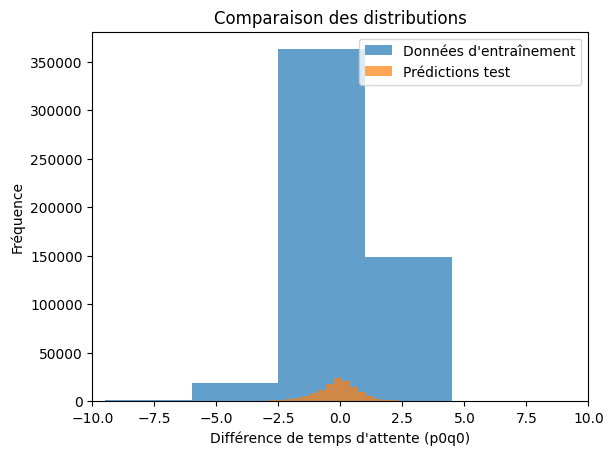

In [29]:
import matplotlib.pyplot as plt

# Comparer les distributions des prédictions et des cibles
plt.hist(y_train_cleaned, bins=50, alpha=0.7, label="Données d'entraînement")
plt.hist(y_val_pred, bins=50, alpha=0.7, label="Prédictions test")
plt.legend()
plt.title("Comparaison des distributions")
plt.xlabel("Différence de temps d'attente (p0q0)")
plt.ylabel("Fréquence")
plt.xlim(-10, 10)
plt.show()


## Après avoir générer le fichier y_test on le test sur le site  https://challengedata.ens.fr/ qui nous indique alors que les prédictions sont bonnes à 80 %
